MACHINE LEARNING

In [ ]:
#Importando os dados

from sklearn.datasets import load_iris

In [ ]:
# Vamos separar os dados de treino e teste
# Então vamos importar a função que faz isso

from sklearn.model_selection import train_test_split

In [ ]:
# Importando o KNN

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dados = load_iris(as_frame=True)['data']
dados['type'] = load_iris(as_frame=True)['target']

dados.head()

In [ ]:
dados.groupby('type').describe()['sepal length (cm)']

In [ ]:
dados.groupby('type').describe()['sepal width (cm)']

In [ ]:
# caracteristica da pétala (Dados de Treino)
X = load_iris(as_frame=True)['data']

# tipo de íris (Reposta)
Y = load_iris(as_frame=True)['target']

Vamos usar X de treino e Y de treino para treinar o nosso modelo de X de teste e Y de teste, para testar se o nosso modelo ta acertando bem

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
neigh.fit(X_train,Y_train)

In [ ]:
# Usando nosso algorito ja treinado para fazer previsões usando os dados de teste

Y_pred = neigh.predict(X_test)
Y_pred

Verificação da Quantidade de Erros

In [ ]:
print('Total de previsões: {} \nObsersavação de teste: {}'.format(X_test.shape[0],(Y_test != Y_pred).sum()))

PADRONIZANDO DADOS COM A MESMA MEDIA E MESMA VARIANCIA

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(X_train).describe()

In [ ]:
# Algoritmo onde K = 3

neigh = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Treinamento

neigh.fit(X_train,Y_train)

In [ ]:
# Usando os dados de teste para fazer previsões com o dados ja treinados

Y_pred = neigh.predict(X_test)
Y_pred

In [ ]:
print('Total de previsões: {} \nObsersavação de teste: {}'.format(X_test.shape[0],(Y_test != Y_pred).sum()))

DEFINIR VALOR IDEAL PARA K

In [ ]:
acerto = []
tamanho_teste = X_test.shape[0]

for i in range (1,15):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    
    acerto_i = (Y_test == pred_i).sum()/tamanho_teste
    acerto.append(100*acerto_i)

In [ ]:
dados_acerto = pd.DataFrame()
dados_acerto['K'] = range (1,15)
dados_acerto['percentual_acerto'] = acerto

In [ ]:
dados_acerto.head()

In [ ]:
import plotly.express as px

In [ ]:
figura = px.line(dados_acerto,x='K', y='percentual_acerto',
                 title='Percentual de Acertos por K')
figura.show()

CLUSTERIZAÇÃO

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid',palette = 'pastel')

In [ ]:
centers = [(-5,-5), (-3,-3), (1,1), (5,5)]
cluster_std = [0.9,.6,1,.8]


x,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centers,n_features=2,random_state=1)

plt.scatter(x[:,0], x[:,1], color = 'blue', edgecolors = 'black', s=15)

Sub divisão dos grupos

In [ ]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', edgecolors= 'black', s=15)
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', edgecolors= 'black', s=15)
plt.scatter(x[y == 2, 0], x[y == 2, 1], color='green', edgecolors= 'black', s=15)
plt.scatter(x[y == 3, 0], x[y == 3, 1], color='orange', edgecolors= 'black', s=15)

Parâmetros de Ajuste Usando Retropropagação

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Gerando dados de exemplo
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Definindo o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1, activation='linear')
])

# Compilando o modelo
model.compile(optimizer='sgd', loss='mean_squared_error')

# Treinando o modelo usando retropropagação
history = model.fit(X, y, epochs=100, verbose=0)

# Visualizando os resultados
plt.plot(history.history['loss'])
plt.title('Ajuste de Parâmetros com Retropropagação')
plt.xlabel('Época')
plt.ylabel('Erro Médio Quadrático')
plt.show()

# Gerando previsões
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Plotando os dados e as previsões
plt.scatter(X, y, label='Dados de Treinamento')
plt.plot(X_new, y_pred, 'r-', label='Previsões')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.legend()
plt.title('Ajuste de Parâmetros com Retropropagação - Resultados')
plt.savefig('ajuste_parametros_retropropagacao.png')
plt.show()


Cross-Entropy

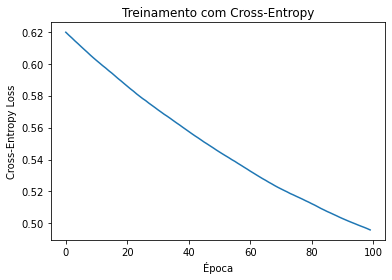

Entrada: 0.2, Previsão: 0.6139222383499146, Classe Prevista: 1.0
Entrada: 0.5, Previsão: 0.663131833076477, Classe Prevista: 1.0
Entrada: 0.8, Previsão: 0.7090417742729187, Classe Prevista: 1.0


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Gerando dados fictícios
np.random.seed(42)
X = np.random.rand(100, 1)
y = (3 * X + 0.5 + 0.2 * np.random.randn(100, 1)) > 1

# Definindo o modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=1, activation='sigmoid')
])

# Compilando o modelo com Cross-Entropy como função de perda
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X, y, epochs=100, verbose=0)

# Visualizando os resultados
plt.plot(history.history['loss'])
plt.title('Treinamento com Cross-Entropy')
plt.xlabel('Época')
plt.ylabel('Cross-Entropy Loss')
plt.show()

# Gerando previsões
X_new = np.array([[0.2], [0.5], [0.8]])
y_pred = model.predict(X_new)

# Arredondando as previsões para obter rótulos de classe
predicted_labels = np.round(y_pred)

# Exibindo resultados
for i in range(len(X_new)):
    print(f'Entrada: {X_new[i][0]}, Previsão: {y_pred[i][0]}, Classe Prevista: {predicted_labels[i][0]}')
